This notebook explores percolation and aggregation stuff using Python.

Date Created: 27 Nov 2018
<br>
Last Modified: 5 Dec 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Nx = 32
Ny = 32

In [4]:
f = np.random.rand(Nx, Ny)

In [5]:
p1 = 0.1
p2 = 0.55
p3 = 0.9

f1 = f.copy()
f1[f > p1] = 0
f1[f <= p1] = 1

f2 = f.copy()
f2[f > p2] = 0
f2[f <= p2] = 1

f3 = f.copy()
f3[f > p3] = 0
f3[f <= p3] = 1

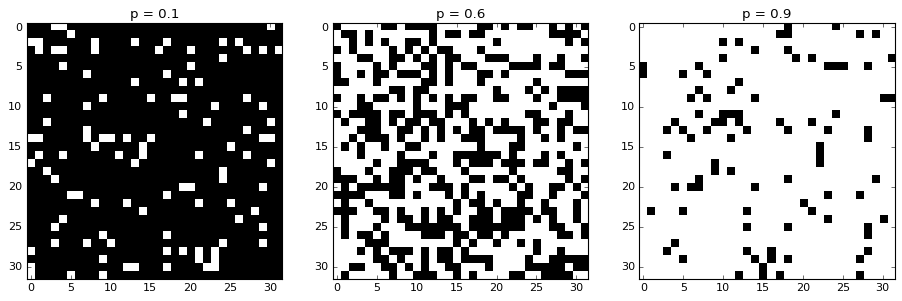

In [6]:
CMAP = 'gray'

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(131)
im = ax.imshow(f1, interpolation='nearest', cmap=CMAP)
ax.set_title('p = %.1f' % p1)
ax = fig.add_subplot(132)
im = ax.imshow(f2, interpolation='nearest', cmap=CMAP)
ax.set_title('p = %.1f' % p2)
ax = fig.add_subplot(133)
im = ax.imshow(f3, interpolation='nearest', cmap=CMAP)
ax.set_title('p = %.1f' % p3)

plt.show()

## Label the clusters

In [7]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html
from scipy.ndimage import measurements

In [8]:
labelled_f1, num_clusters_f1 = measurements.label(f1)
labelled_f2, num_clusters_f2 = measurements.label(f2)
labelled_f3, num_clusters_f3 = measurements.label(f3)

In [9]:
labelled_f1

array([[ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4,  4,  0, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [84,  0,  0, ...,  0,  0,  0],
       [84,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [10]:
num_clusters_f1

88

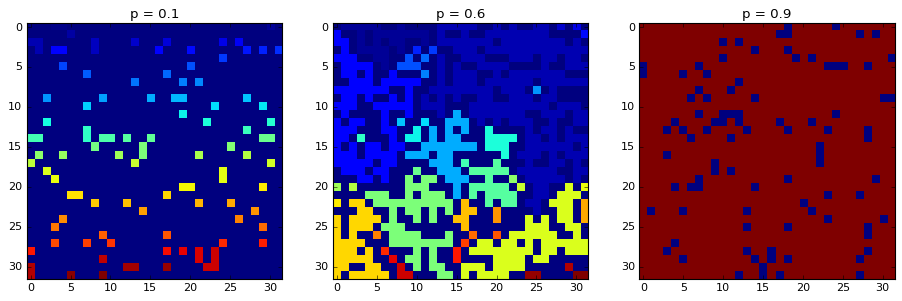

In [11]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(131)
im = ax.imshow(labelled_f1, interpolation='nearest')
ax.set_title('p = %.1f' % p1)
ax = fig.add_subplot(132)
im = ax.imshow(labelled_f2, interpolation='nearest')
ax.set_title('p = %.1f' % p2)
ax = fig.add_subplot(133)
im = ax.imshow(labelled_f3, interpolation='nearest')
ax.set_title('p = %.1f' % p3)

plt.show()

# Number of clusters

In [12]:
p_vec = np.linspace(0,1,100)

In [13]:
Nx = 256
Ny = 256

In [14]:
f = np.random.rand(Nx, Ny)

In [15]:
num_clusters = np.zeros(len(p_vec))

for i,p in enumerate(p_vec):
    cluster_p = (f <= p)
    
    labelled_p, num_clusters_p = measurements.label(cluster_p)
    
    num_clusters[i] = num_clusters_p

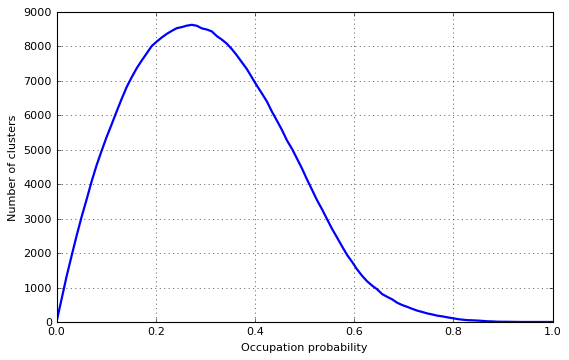

In [16]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(p_vec, num_clusters, linewidth=2)
ax.set_xlabel('Occupation probability')
ax.set_ylabel('Number of clusters')
ax.grid()

plt.show()

# Largest cluster size

In [17]:
Nx = 32
Ny = 32

p_vec = np.linspace(0.1,1,50)
p_vec_len = len(p_vec)

num_rep_max = 100

largestSize_vec = np.zeros(p_vec_len)
largestSizeAvg_map = np.zeros([p_vec_len, num_rep_max])

for num_rep in range(num_rep_max):
    f = np.random.rand(Nx,Ny)
    
    for i in range(p_vec_len):
        cluster_p = (f <= p_vec[i])

        # Label the cluster
        labelled_p, num_clusters_p = measurements.label(cluster_p)

        # Record the size of each cluster
        cluster_size_vec = np.zeros(num_clusters_p)
        for cluster_label in range(1, num_clusters_p+1):
            cluster_size_vec[cluster_label-1] = np.sum(labelled_p == cluster_label)

        # Get max cluster size
        largestSize_vec[i] = np.max(cluster_size_vec)
    # Store max cluster size   
    largestSizeAvg_map[:,num_rep] = largestSize_vec

In [18]:
# Average and normalise
largestSizeAvg_vec = np.mean(largestSizeAvg_map,1) / (p_vec*Nx*Ny)
largestSizeAvg_vec_error = np.std(largestSizeAvg_map,1) / (p_vec*Nx*Ny)

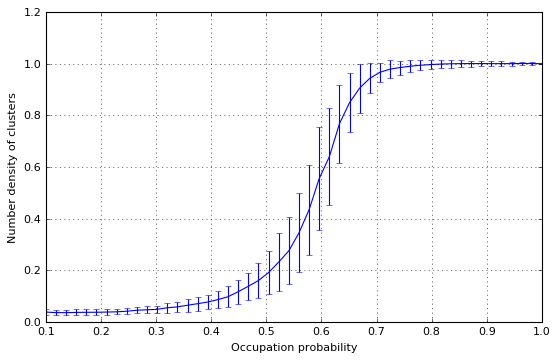

In [19]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.errorbar(p_vec, largestSizeAvg_vec, largestSizeAvg_vec_error)
ax.set_xlabel('Occupation probability')
ax.set_ylabel('Number density of clusters')
ax.grid()

plt.show()

In [20]:
plt.errorbar?

# A large system

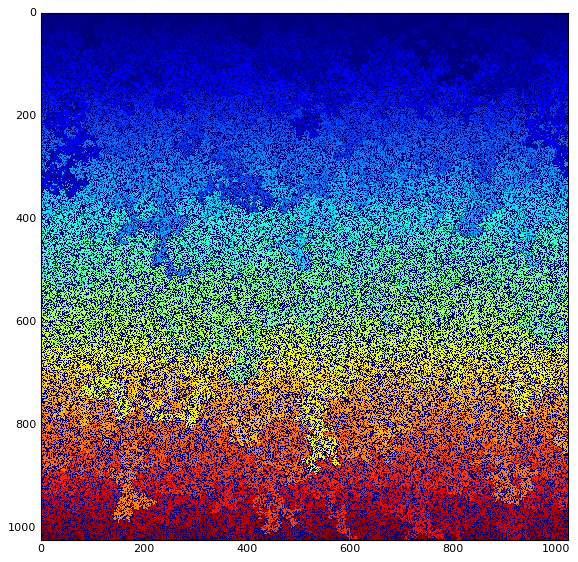

In [21]:
f = np.random.rand(1024, 1024)

f1 = f.copy()
f1[f >  0.57] = 0
f1[f <= 0.57] = 1
labelled_f1, num_clusters_f1 = measurements.label(f1)

fig = plt.figure(figsize=(8.5,8.5))
ax = fig.add_subplot(111)
im = ax.imshow(labelled_f1, interpolation='nearest', cmap='jet')
plt.show()